In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model


In [2]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [3]:
district = pd.read_csv("district_wise_rainfall_normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

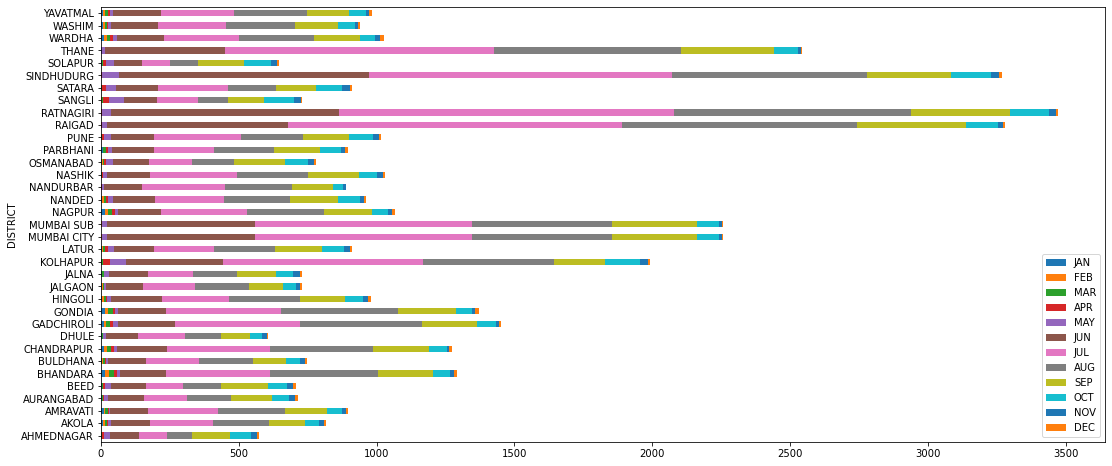

In [4]:
mh_data = district[district['STATE_UT_NAME'] == 'MAHARASHTRA']
mh_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

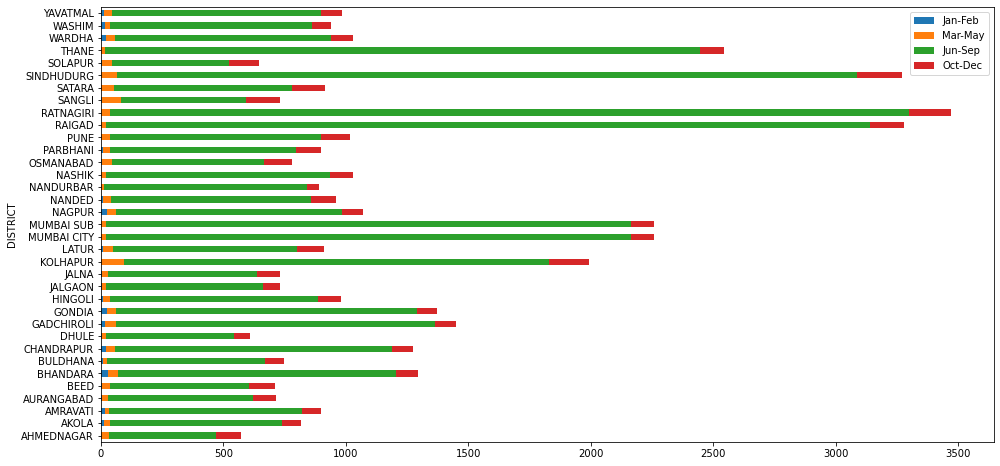

In [5]:
mh_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

In [6]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'MAHARASHTRA']
rat = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'RATNAGIRI'])
# print temp
X_year = None; y_year = None
for i in range(rat.shape[1]-3):
    if X_year is None:
        X_year = rat[:, i:i+3]
        y_year = rat[:, i+3]
    else:
        X_year = np.concatenate((X_year, rat[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, rat[:, i+3]), axis=0)
 

In [8]:
# from keras.models import Model
# from keras.layers import Dense, Input, Conv1D, Flatten

# # NN model
# inputs = Input(shape=(3,1))
# x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
# x = Conv1D(128, 2, padding='same', activation='elu')(x)
# x = Flatten()(x)
# x = Dense(128, activation='elu')(x)
# x = Dense(64, activation='elu')(x)
# x = Dense(32, activation='elu')(x)
# x = Dense(1, activation='linear')(x)
# model = Model(inputs=[inputs], outputs=[x])
# model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
# model.summary()

In [9]:

# model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
# y_pred = model.predict(np.expand_dims(X_test, axis=2))
# print (mean_absolute_error(y_test, y_pred))

In [10]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

57.08862331011229


MEAN RATNAGIRI
385.59999999999997 302.90898807027514
Standard deviation RATNAGIRI
436.0103260754778 418.3131287592906


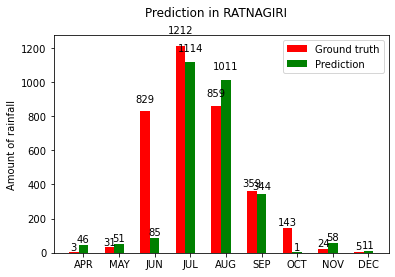

In [11]:
y_year_pred = reg.predict(X_year)
print ("MEAN RATNAGIRI")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation RATNAGIRI")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in RATNAGIRI")

In [12]:
# training and testing sets for only maharashtra data.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(mh_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

62.00112581905542


MEAN RATNAGIRI
385.59999999999997 288.4904541203892
Standard deviation RATNAGIRI
436.0103260754778 386.127642206429


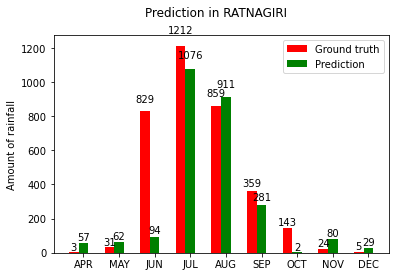

In [14]:
y_year_pred = reg.predict(X_year)
print ("MEAN RATNAGIRI")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation RATNAGIRI")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in RATNAGIRI")

In [15]:
# model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
# y_pred = model.predict(np.expand_dims(X_test, axis=2))
# print (mean_absolute_error(y_test, y_pred))

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

103.82785198722645


MEAN RATNAGIRI
385.59999999999997 288.4904541203892
Standard deviation RATNAGIRI
436.0103260754778 386.127642206429


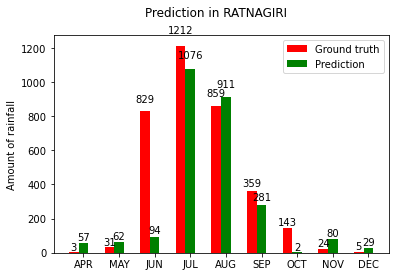

In [19]:
y_year_pred = reg.predict(X_year)
print ("MEAN RATNAGIRI")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation RATNAGIRI")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in RATNAGIRI")